## Heart Disease Prediction

### Objectives

Cardiovascular disease (CVD) is the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5 CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVD and this dataset contains 11 features that can be used to predict possible heart disease.

The purpose of the following analysis is to train a machine learning model to predict heart disease based on these 11 features. The main objective is focussed on prediction; however, we will look at interpretation of the models where possible. 

### Dataset Summary 

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

#### Attribute Information

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: In an ECG, oldpeak is a measure of the ST depression induced by exercise relative to rest. It is a measure of abnormality in electrocardiograms (the higher the more abnormal).
* ST_Slope: the slope of the peak exercise ST segment on an ECG [Up: upsloping, Flat: flat, Down: downsloping]. This indicates the quality of bloodflow to the heart. 
* HeartDisease: output class [1: heart disease, 0: Normal]

###  Exploratory Data Analysis

In [1]:
## Import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score


In [2]:
heart = pd.read_csv("heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [44]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [46]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


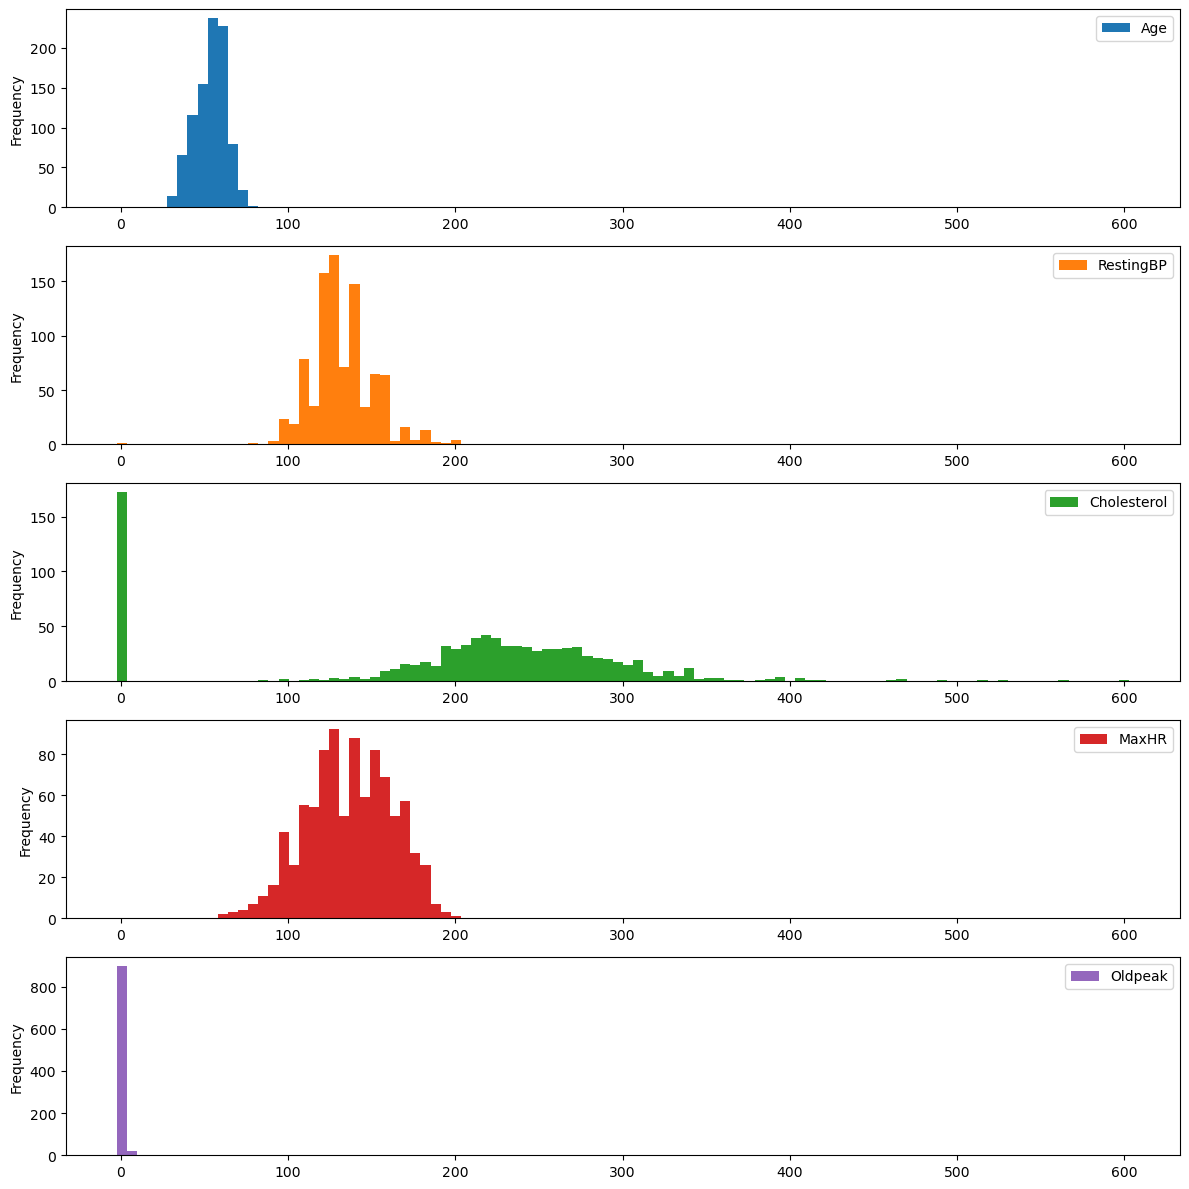

In [87]:
numerical = heart[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]

fig, ax = plt.subplots(5, 1, figsize=(12, 12), tight_layout=True,sharex=False)
numerical.plot(ax=ax, kind="hist", bins= 100,subplots=True)

plt.show()

#### The following charts illustrate some relevant connections between the numerical features in this dataset and heart disease:
* The median age of people with heart disease is higher than that of people without heart disease
* Cholesterol levels tend to be lower for people with heart disease; we would perhaps need to understand HDL vs LDL cholesterol levels to interpret this link further
* On average, the maximum heart rate reached during the ECG was higher for people without heart disease. 
* Median oldpeak was higher for people with heart disease

We also note that we do not appear to have a material multi-collinearity problem; the highest (negative) correlation between numerical features exists between maximum heart rate and age.

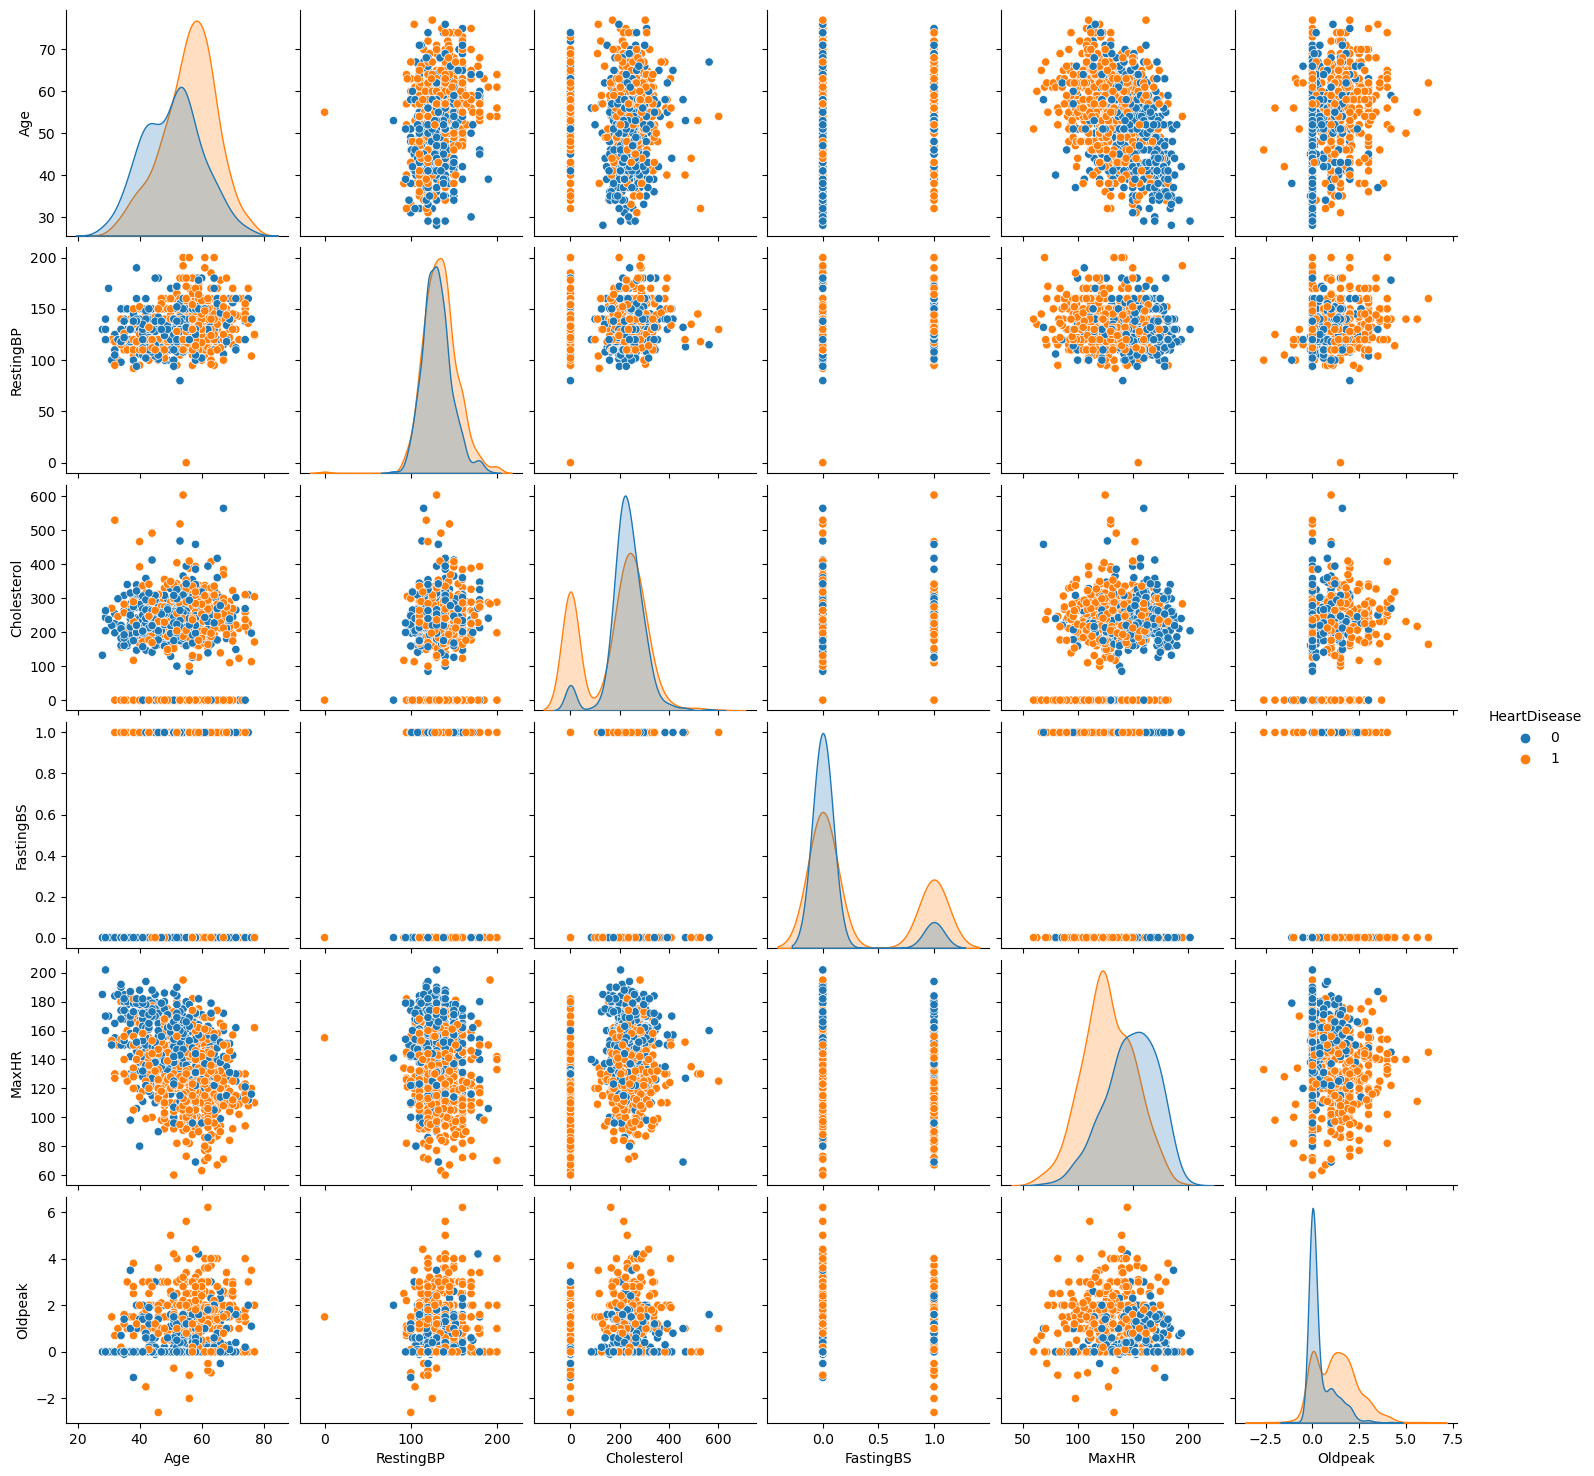

In [4]:
sns.pairplot(heart,hue="HeartDisease");

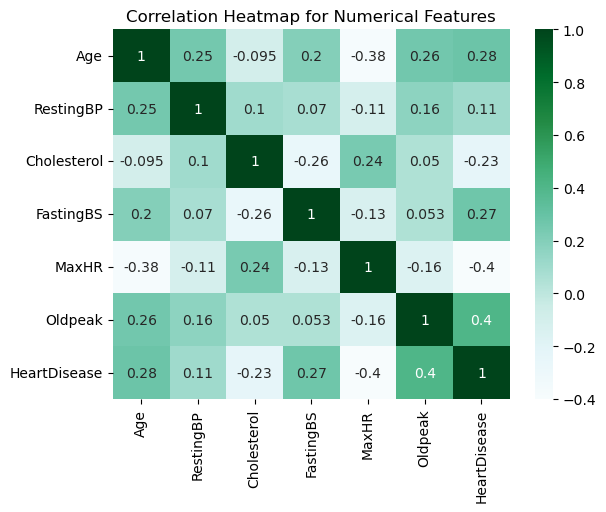

In [5]:
corr = heart[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]].corr()
sns.heatmap(corr,annot=True,cmap="BuGn")
plt.title("Correlation Heatmap for Numerical Features");

In [6]:
heart.describe(include="object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


#### The following tables illustrate some relevant connections between categorical features and heart disease:

* The proportion of heart disease outcome in this dataset was significantly higher for men than for women
* With regards to chest pain, people that were asymptomatic in this study showed a significantly higher proportion of heart disease than those with various types of chest pain
* Heart disease was significantly more prevelant in people with high fasting blood sugar
* People showing a ST-T wave abnormality in a resting ECG were somewhat more likely to have heart disease than other groups
* Study participants showing exercise angina were significantly more likely to have heart disease than others
* A down or flat ST slope on an ECG may be indicative of a greater risk of heart disease.

In [7]:
categorical = ["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope"]

for col in categorical:
    print(round(pd.crosstab(heart[col],heart.HeartDisease,normalize="index",margins=True)*100,1))
    print("\n")

HeartDisease     0     1
Sex                     
F             74.1  25.9
M             36.8  63.2
All           44.7  55.3


HeartDisease      0     1
ChestPainType            
ASY            21.0  79.0
ATA            86.1  13.9
NAP            64.5  35.5
TA             56.5  43.5
All            44.7  55.3


HeartDisease     0     1
FastingBS               
0             52.0  48.0
1             20.6  79.4
All           44.7  55.3


HeartDisease     0     1
RestingECG              
LVH           43.6  56.4
Normal        48.4  51.6
ST            34.3  65.7
All           44.7  55.3


HeartDisease       0     1
ExerciseAngina            
N               64.9  35.1
Y               14.8  85.2
All             44.7  55.3


HeartDisease     0     1
ST_Slope                
Down          22.2  77.8
Flat          17.2  82.8
Up            80.3  19.7
All           44.7  55.3




In [41]:
pd.DataFrame(heart["HeartDisease"].value_counts())

,HeartDisease
1,508
0,410


The target variable split is relatively balanced, hence we will refrain from attempting to balance the classes further.

### Summary of data cleaning and data engineering

The dataset appeared clean in that it did not contain missing values, duplicated rows or very evident outliers. We therefore only split the dataset into training and test data (20% were test data), created dummy variables for categorical features and standardized numerical features.

In [9]:
X = heart.drop(["HeartDisease"],axis=1)

In [10]:
y = heart["HeartDisease"]

In [11]:
X = pd.get_dummies(X,drop_first=True)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [13]:
s = StandardScaler()
scaling_columns = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
X_train_s = s.fit_transform(X_train[scaling_columns])
X_test_s = s.transform(X_test[scaling_columns])

In [14]:
X_train[scaling_columns]=X_train_s
X_test[scaling_columns]=X_test_s

### Heart disease prediction models

We have trained a selection of classification models, including "simple" Logistic Regression, Decision Tree, K Nearest Neighbors, Support Vector Machine as well as ensemble models (Random Forest, Gradient Boosting, Stacking). As can be seen below, ensemble methods only show a very limited improvement vs the simpler models, and hence we would recommend opting for one of the simpler models for the sake of interpretability. We consequently lean towards the Logistic Regression models, where feature importance can be easily extracted.

#### 1. Logistic Regression

In [43]:
lr = LogisticRegression(solver="liblinear",penalty="l2")
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        83
           1       0.87      0.89      0.88       101

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



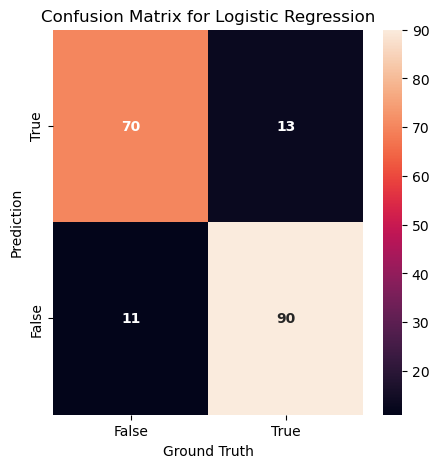

In [34]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)
ax.set_title("Confusion Matrix for Logistic Regression")
plt.show()

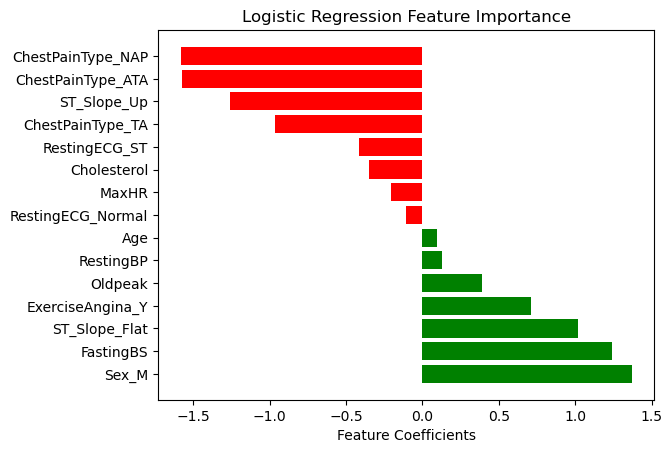

In [17]:
coef_dict = {}
for coef, feat in zip(lr.coef_[0], list(X.columns)):
    coef_dict[feat] = coef
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}

features = list(coef_dict.keys())
values = list(coef_dict.values())    

color_vals = []
for val in values:
    if val <= 0:
        color_vals.append('r')
    else:
        color_vals.append('g')

y_pos = np.arange(len(features))
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y_pos, values, align='center', color=color_vals)
ax.set_yticks(y_pos)
ax.set_yticklabels(features)

ax.invert_yaxis()  
ax.set_xlabel('Feature Coefficients')
ax.set_title('Logistic Regression Feature Importance')
plt.show()


#### 2. Decision Tree Classifier

In [18]:
dt = DecisionTreeClassifier(max_depth=6,max_features=9,random_state=13)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        83
           1       0.90      0.86      0.88       101

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



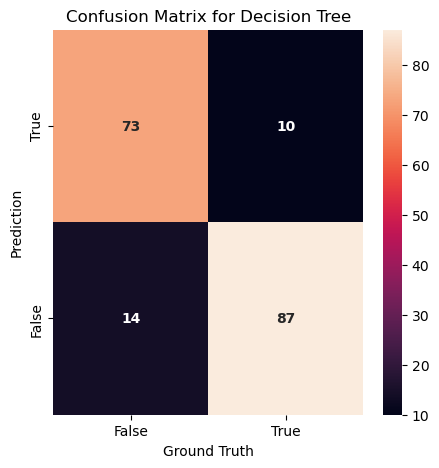

In [35]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)
ax.set_title("Confusion Matrix for Decision Tree")
plt.show()

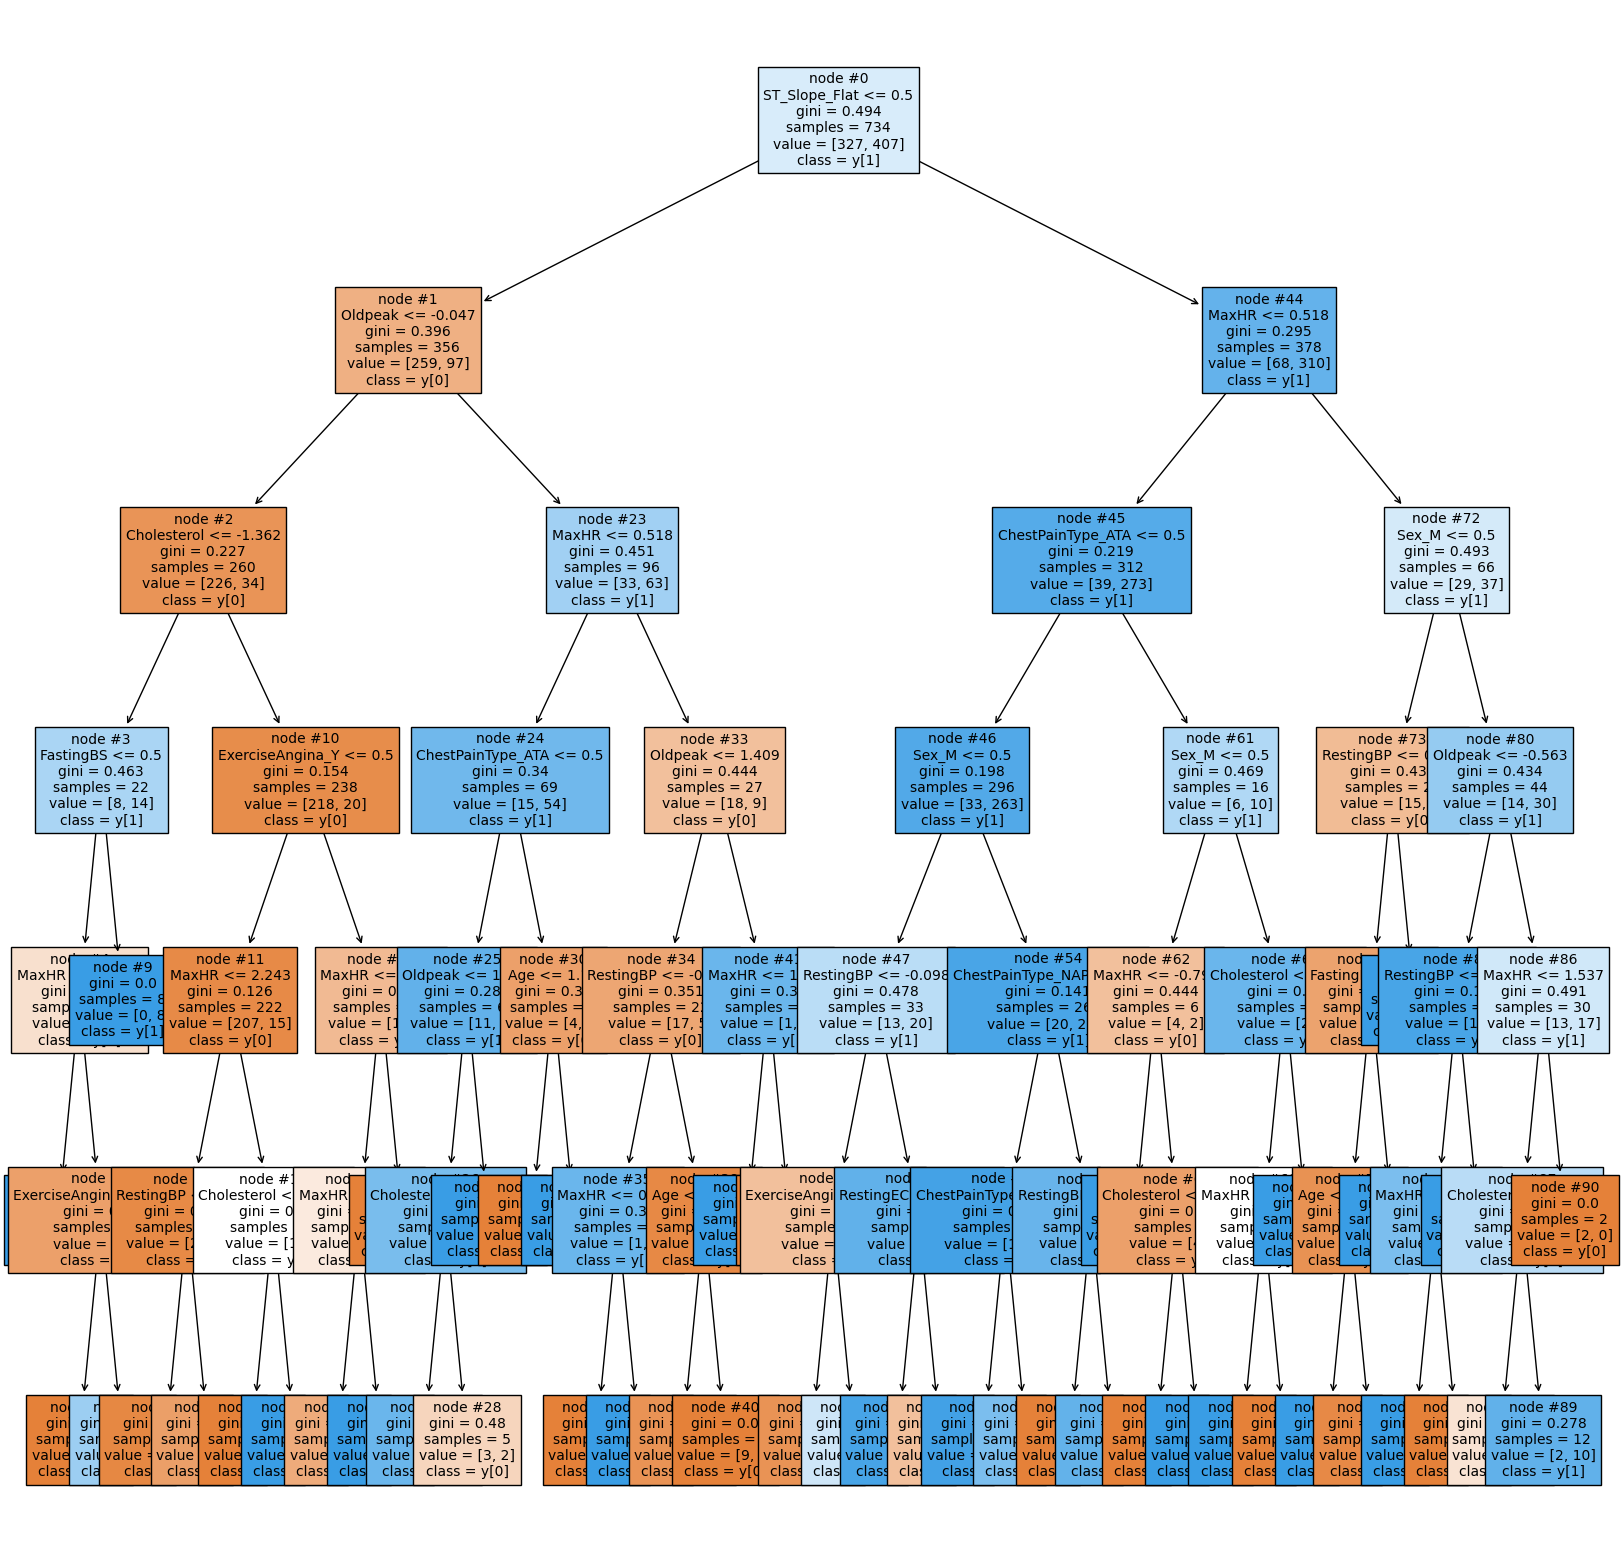

In [20]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt,feature_names= list(X.columns),filled=True, fontsize= 10, node_ids = True, class_names= True)
plt.show()

#### 3. K Nearest Neighbors Classifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        83
           1       0.87      0.88      0.88       101

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



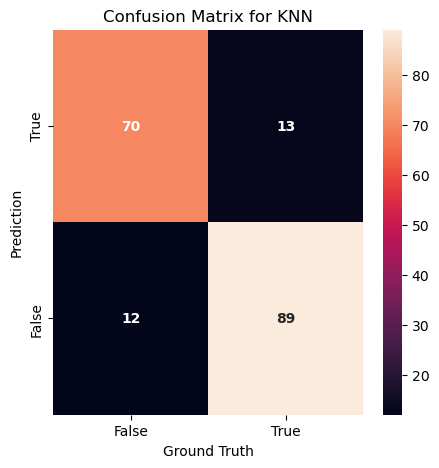

In [36]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)
ax.set_title("Confusion Matrix for KNN")
plt.show()

#### 4. Support Vector Machines Classifier

In [23]:
svm = SVC(C=30, gamma=0.001,kernel='rbf')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        83
           1       0.87      0.89      0.88       101

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



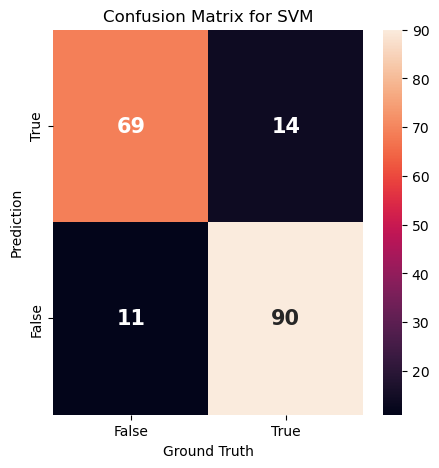

In [37]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', annot_kws={"size": 15, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)
ax.set_title("Confusion Matrix for SVM")
plt.show()

#### 5.  Random Forest Classifier

In [25]:
model = RandomForestClassifier()
param_grid = {'n_estimators': [50,100,200],
             'max_depth' : [6,7,8],
             'max_features':[4,5,6]}

rf = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        83
           1       0.88      0.87      0.88       101

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



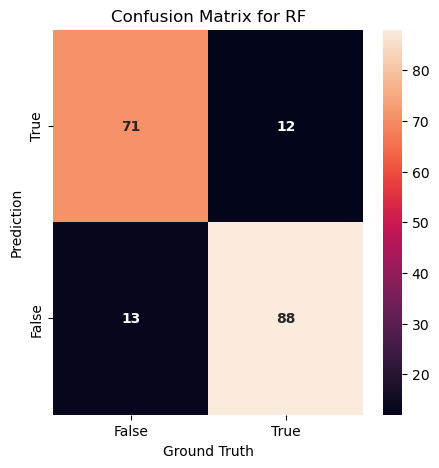

In [38]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)
ax.set_title("Confusion Matrix for RF")
plt.show()

#### 6. Gradient Boosting Classifier

In [27]:
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.01, 0.001],
              'subsample': [1.0, 0.5],
              'max_features': [2, 3, 4]}

GBC = GridSearchCV(GradientBoostingClassifier(random_state=13), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GBC = GBC.fit(X_train, y_train)

In [28]:
y_pred_gbc = GBC.predict(X_test)
print(classification_report(y_pred_gbc, y_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        80
           1       0.89      0.87      0.88       104

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



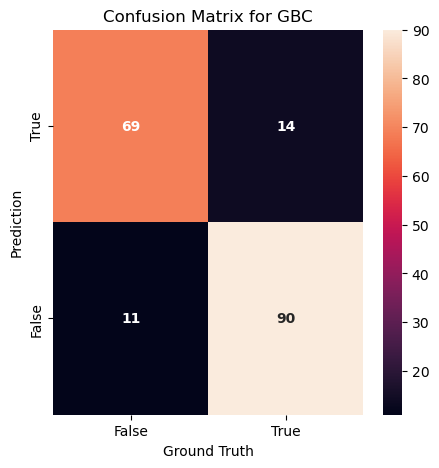

In [39]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_gbc), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)
ax.set_title("Confusion Matrix for GBC")
plt.show()

#### 7. Stacking

In [30]:
estimators = [('LR', lr), ('DT',dt),('GBC',GBC)]

VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)
y_pred_vc = VC.predict(X_test)
print(classification_report(y_pred_vc, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



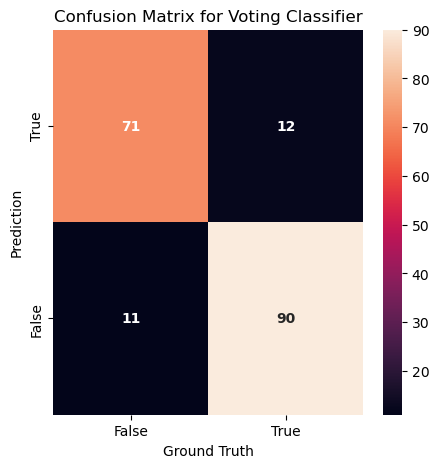

In [40]:
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_vc), annot=True, fmt='d', annot_kws={"size": 10, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=10);
ax.set_yticklabels(labels[::-1], fontsize=10);
ax.set_ylabel('Prediction', fontsize=10);
ax.set_xlabel('Ground Truth', fontsize=10)
ax.set_title("Confusion Matrix for Voting Classifier")
plt.show()

### Summary Key Findings and Insights

The Logistic Regression model correctly identifies 89% of all Heart Disease cases in the test data set and has an overall accuracy rate of 87%. 

The most important positive indicators for Heart disease according to this model are:
* Male gender
* A high fasting blood sugar level
* A flat (or down) ST slope on the ECG
* Exercise-induced angina

The most important negative indicators for Heart disease are:
* Any kind of chest pain (this seems surprising and should be investigated further)
* An upward ST slope on the ECG


### Next Steps and Suggested Further Analysis

Some of the findings of the above analysis appear unusual and merit further investigation. For instance, higher cholesterol levels appear to be a negative indicator for heart disease. We would propose gathering this data broken down into LDL and HDL cholesterol levels in order to see if this results in a more nuanced outcome. Another very surprising result is that the presence of any kind of chest pain appears to be a negative indicator for heart disease. We would propose going back to the original sources of this dataset to see how this data was originally gathered (presumably a subjective memory of past chest pain). It may also be interesting to look into other features which may not have been included in this dataset that are correlated to the perceived chest pain and may explain the lower apparent heart disease probability. 